In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# import pandas_profiling

# ----------------- 학습 ----------------------
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# ----------------- 모델 ----------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from xgboost.sklearn import XGBRegressor, XGBClassifier

# ----------------- 평가 ----------------------
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
# from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

# from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

# 데이터 로드

In [3]:
train = pd.read_csv('../data/traindf.csv')
test = pd.read_csv('../data/testdf.csv')
train = train.rename(columns={'Unnamed: 0':'날짜'})
test = test.rename(columns={'Unnamed: 0':'날짜'})

# train.info(),test.info()

In [4]:
train.head(2)

,날짜,장중_긍정비율,장중_부정비율,장중_긍부정비율,장외_긍정비율,장외_부정비율,장외_긍부정비율,등락률,등락여부
0,2021-01-04,0.888889,0.111111,0.666667,0.916667,0.083333,0.75,2.47,1.0
1,2021-01-05,0.951613,0.048387,0.854839,0.900000,0.100000,0.70,1.57,1.0


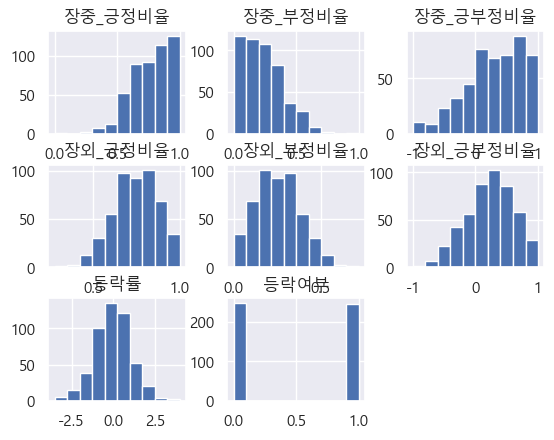

In [5]:
train.hist()
plt.show()

# optuna
<pre>
Best param: {'reg_alpha': 6.967235245933871, 'reg_lambda': 1.3562544880457188, 'learning_rate': 0.09590960213297267, 'max_depth': 30}
Best param: {'reg_alpha': 6.967235245933871, 'reg_lambda': 1.3562544880457188, 'learning_rate': 0.09590960213297267, 'max_depth': 30}

In [6]:
train = pd.read_csv('../data/traindf.csv')
test = pd.read_csv('../data/testdf.csv')
train = train.rename(columns={'Unnamed: 0':'날짜'})
test = test.rename(columns={'Unnamed: 0':'날짜'})

# train.info(),test.info()

In [7]:
X_train = train.drop(['날짜','등락률','등락여부'],axis=1)
y_train = train['등락률']
X_test = test.drop(['날짜','등락률','등락여부'],axis=1)
y_test= test['등락률']

In [8]:
import optuna

In [9]:
def my_objective_XGB(trial, data=X_train, target=y_train):
    
    #train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.2,random_state=42)
    param = {
        # 'metric': 'rmse', 
        'random_state': 1,
        'n_estimators': 100,  #100
        'reg_alpha' : trial.suggest_float('reg_alpha', 1e-2, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-2, 10.0),  #reg_alpha=0.0
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01,0.1),
        'max_depth': trial.suggest_categorical('max_depth', [1,30]),
        #'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        #'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        #'num_leaves' : trial.suggest_int('num_leaves', 1, 1000),
        #'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
        #'cat_smooth' : trial.suggest_int('min_data_per_groups', 1, 100)
    }
    model = XGBRegressor(**param)  
    
    model.fit(X_train,y_train
              ,eval_set=[(X_test,y_test)]
              ,early_stopping_rounds=10,verbose=False)
    pred = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, pred,squared=False)
    return rmse

In [10]:

study = optuna.create_study(direction='minimize')


# y_train = np.expm1(y_train_log)
# y_test  = np.expm1(y_test_log)


# my_objective_LGBM(trial):
# study.optimize(my_objective_LGBM, n_trials=50)

# def my_objective_LGBM(trial, data=X_train, target=y_train):
study.optimize(lambda trial : my_objective_XGB(trial, y_train,y_test), n_trials=100)

[I 2023-06-27 12:53:22,662] A new study created in memory with name: no-name-4629e508-e302-4b0a-9a26-0d35d53d50a9
[I 2023-06-27 12:53:22,776] Trial 0 finished with value: 0.8086771083537574 and parameters: {'reg_alpha': 8.680000053705184, 'reg_lambda': 5.448453687108639, 'learning_rate': 0.017203667181513622, 'max_depth': 30}. Best is trial 0 with value: 0.8086771083537574.
[I 2023-06-27 12:53:22,827] Trial 1 finished with value: 0.8048915896001861 and parameters: {'reg_alpha': 5.806529015882012, 'reg_lambda': 6.258954368293982, 'learning_rate': 0.027324451817892358, 'max_depth': 30}. Best is trial 1 with value: 0.8048915896001861.
[I 2023-06-27 12:53:22,870] Trial 2 finished with value: 0.8168957429686413 and parameters: {'reg_alpha': 1.2888008598553207, 'reg_lambda': 2.6317945966051473, 'learning_rate': 0.01307568014472375, 'max_depth': 1}. Best is trial 1 with value: 0.8048915896001861.
[I 2023-06-27 12:53:22,927] Trial 3 finished with value: 0.8117009871783677 and parameters: {'reg

In [11]:
print('튜닝 횟수 :', len(study.trials))
print("-------------------")
print('Best param:', study.best_trial.params)
print('Best param:', study.best_params)
print("-------------------")
print('Best score:', study.best_trial.value)
print("-------------------")
print('study.trials 전체 정보 :', study.trials)


튜닝 횟수 : 100
-------------------
Best param: {'reg_alpha': 4.8377793423263995, 'reg_lambda': 1.6721333302506851, 'learning_rate': 0.06089208435440014, 'max_depth': 30}
Best param: {'reg_alpha': 4.8377793423263995, 'reg_lambda': 1.6721333302506851, 'learning_rate': 0.06089208435440014, 'max_depth': 30}
-------------------
Best score: 0.8018363585094409
-------------------
study.trials 전체 정보 : [FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.8086771083537574], datetime_start=datetime.datetime(2023, 6, 27, 12, 53, 22, 665525), datetime_complete=datetime.datetime(2023, 6, 27, 12, 53, 22, 776228), params={'reg_alpha': 8.680000053705184, 'reg_lambda': 5.448453687108639, 'learning_rate': 0.017203667181513622, 'max_depth': 30}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'reg_alpha': FloatDistribution(high=10.0, log=False, low=0.01, step=None), 'reg_lambda': FloatDistribution(high=10.0, log=False, low=0.01, step=None), 'learning_rate': FloatDistribution(hig

## 스케일링 X
* RMSE : 1.1463  -->  모델 최적화 :  0.8586

In [12]:
X_train = train[['장중_긍정비율','장중_부정비율','장중_긍부정비율','장외_긍정비율','장외_부정비율','장외_긍부정비율']]
y_train = train['등락률']
X_test = test[['장중_긍정비율','장중_부정비율','장중_긍부정비율','장외_긍정비율','장외_부정비율','장외_긍부정비율']]
y_test= test['등락률']

Best param: {'reg_alpha': 6.967235245933871, 'reg_lambda': 1.3562544880457188, 'learning_rate': 0.09590960213297267, 'max_depth': 30}

In [18]:
from sklearn.metrics import r2_score
xgb=XGBRegressor(random_state = 1, reg_alpha= 6.967235245933871, reg_lambda= 1.3562544880457188, learning_rate= 0.09590960213297267, max_depth= 30)
xgb.fit(X_train,y_train)
# print( xgb.coef_ )

pred = xgb.predict(X_test)
rmse = mean_squared_error(y_test, pred, squared=False)
print(f"RMSE : {rmse:.4f}")
r2_score = r2_score(y_test, pred)
print(f"r2_score : {r2_score:.4f}")


RMSE : 0.8586
r2_score : 0.0201


* 튜닝 횟수 : 100
-------------------
Best param: {'reg_alpha': 3.3717879362164433, 'reg_lambda': 7.717229908431166, 'learning_rate': 0.0774507280558759, 'max_depth': 30}
Best param: {'reg_alpha': 3.3717879362164433, 'reg_lambda': 7.717229908431166, 'learning_rate': 0.0774507280558759, 'max_depth': 30}
-------------------
Best score: 0.8016964052882356

* RMSE : 0.8871

In [14]:
xgb=XGBRegressor(random_state = 1, reg_alpha= 3.3717879362164433, reg_lambda= 7.717229908431166, learning_rate= 0.0774507280558759, max_depth= 30)
xgb.fit(X_train,y_train)
# print( xgb.coef_ )

pred = xgb.predict(X_test)
rmse = mean_squared_error(y_test, pred, squared=False)
print(f"RMSE : {rmse:.4f}")

RMSE : 0.8871


## 로그 스케일링
* RMSE : 1.2358 -->  모델최적화 RMSE : 0.9212

In [15]:
train = pd.read_csv('../Chat NBT/data/traindf.csv')
test = pd.read_csv('../Chat NBT/data/testdf.csv')
train = train.rename(columns={'Unnamed: 0':'날짜'})
test = test.rename(columns={'Unnamed: 0':'날짜'})

# train.info(),test.info()

FileNotFoundError: [Errno 2] No such file or directory: '../Chat NBT/data/traindf.csv'

In [ ]:
columns = ['장중_긍정비율', '장중_부정비율',  '장외_긍정비율', '장외_부정비율']

In [ ]:
train.columns

In [ ]:
train['장중_긍정비율'].max(),train['장중_긍정비율'].min()

In [ ]:
for col in columns:
    train[col] = np.log1p(train[col])

In [ ]:
train.hist()
plt.show()

In [ ]:
train.head(2)

In [ ]:
X_train = train.drop(['날짜','등락률','등락여부'],axis=1)
y_train = train['등락률']
X_test = test.drop(['날짜','등락률','등락여부'],axis=1)
y_test= test['등락률']

In [ ]:
xgb=XGBRegressor(random_state = 1, reg_alpha= 6.967235245933871, reg_lambda= 1.3562544880457188, learning_rate= 0.09590960213297267, max_depth= 30)
xgb.fit(X_train,y_train)
# print( xgb.coef_ )

pred = xgb.predict(X_test)
rmse = mean_squared_error(y_test, pred, squared=False)
print(f"RMSE : {rmse:.4f}")

## MinMax Scale
* RMSE : 1.1463 ---> 모델최적화  RMSE : 0.8586

In [ ]:
train = pd.read_csv('../Chat NBT/data/traindf.csv')
test = pd.read_csv('../Chat NBT/data/testdf.csv')
train = train.rename(columns={'Unnamed: 0':'날짜'})
test = test.rename(columns={'Unnamed: 0':'날짜'})

# train.info(),test.info()

In [ ]:
train.columns

In [ ]:
X_train = train.drop(['날짜','등락률','등락여부'],axis=1)
y_train = train['등락률']
X_test = test.drop(['날짜','등락률','등락여부'],axis=1)
y_test= test['등락률']

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
scaler.transform(X_train)
scaler.transform(X_test)


In [ ]:
# inverse_transform(X)

In [ ]:
xgb=XGBRegressor(random_state = 1, reg_alpha= 6.967235245933871, reg_lambda= 1.3562544880457188, learning_rate= 0.09590960213297267, max_depth= 30)
xgb.fit(X_train,y_train)
# print( xgb.coef_ )

pred = xgb.predict(X_test)
rmse = mean_squared_error(y_test, pred, squared=False)
print(f"RMSE : {rmse:.4f}")

## StandardScaler
* 1.1463 ---> 모델최적화 RMSE : 0.8586

In [ ]:
train = pd.read_csv('../Chat NBT/data/traindf.csv')
test = pd.read_csv('../Chat NBT/data/testdf.csv')
train = train.rename(columns={'Unnamed: 0':'날짜'})
test = test.rename(columns={'Unnamed: 0':'날짜'})

# train.info(),test.info()

In [ ]:
train.columns

In [ ]:
X_train = train.drop(['날짜','등락률','등락여부'],axis=1)
y_train = train['등락률']
X_test = test.drop(['날짜','등락률','등락여부'],axis=1)
y_test= test['등락률']

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)
scaler.transform(X_test)


In [ ]:
# inverse_transform(X)

In [ ]:
xgb=XGBRegressor(random_state = 1, reg_alpha= 6.967235245933871, reg_lambda= 1.3562544880457188, learning_rate= 0.09590960213297267, max_depth= 30)
xgb.fit(X_train,y_train)
# print( xgb.coef_ )

pred = xgb.predict(X_test)
rmse = mean_squared_error(y_test, pred, squared=False)
print(f"RMSE : {rmse:.4f}")

## RobustScaler
* 1.1463   --> 모델 최적화 RMSE : 0.8586

In [ ]:
train = pd.read_csv('../Chat NBT/data/traindf.csv')
test = pd.read_csv('../Chat NBT/data/testdf.csv')
train = train.rename(columns={'Unnamed: 0':'날짜'})
test = test.rename(columns={'Unnamed: 0':'날짜'})

# train.info(),test.info()

In [ ]:
train.columns

In [ ]:
X_train = train.drop(['날짜','등락률','등락여부'],axis=1)
y_train = train['등락률']
X_test = test.drop(['날짜','등락률','등락여부'],axis=1)
y_test= test['등락률']

In [ ]:
scaler =  RobustScaler()
scaler.fit(X_train)
scaler.transform(X_train)
scaler.transform(X_test)


In [ ]:
# inverse_transform(X)

In [ ]:
xgb=XGBRegressor(random_state = 1, reg_alpha= 6.967235245933871, reg_lambda= 1.3562544880457188, learning_rate= 0.09590960213297267, max_depth= 30)
xgb.fit(X_train,y_train)
# print( xgb.coef_ )

pred = xgb.predict(X_test)
rmse = mean_squared_error(y_test, pred, squared=False)
print(f"RMSE : {rmse:.4f}")